In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import optuna
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
db_paths = glob('/net/argon/landclim/kraftb/machflow_engression/runs_timesplit/*/tune/optuna.db')

In [3]:
beta = []
esl = []
nl = []
path = []
loss = []

for db_path in db_paths:
    study = optuna.load_study('LSTM', f'sqlite:///{db_path}')
    config = db_path.split('/')[-3].split('_')

    beta.append(float(config[0].split('beta')[1]))
    esl.append(int(config[1].split('esl')[1]))
    nl.append(int(config[2].split('nl')[1]))
    loss.append(study.best_value)
    path.append(db_path)

/tmp/ipykernel_2088/1054386906.py:8: FutureWarning: load_study() got {'study_name', 'storage'} as positional arguments but they were expected to be given as keyword arguments.
  study = optuna.load_study('LSTM', f'sqlite:///{db_path}')


In [4]:
df = pd.DataFrame({'beta': beta, 'esl': esl, 'nl': nl, 'loss': loss, 'path': path})

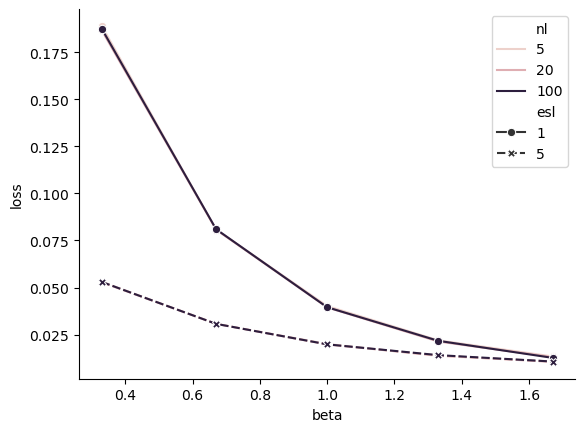

In [5]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x='beta', y='loss', hue='nl', style='esl', markers=True, ax=ax)
ax.spines[['top', 'right']].set_visible(False)

In [6]:
best_path = df.iloc[df.loss.argmin()].path
best_preds_path = '/'.join(best_path.split('/')[:-2]) + '/xval/fold_000/preds.zarr'
ds = xr.open_dataset(best_preds_path)
ds = ds.where(ds.folds > 0, drop=True)

/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [7]:
best_path

'/net/argon/landclim/kraftb/machflow_engression/runs_timesplit/beta1.67_esl005_nl020/tune/optuna.db'

In [8]:
for i in tqdm(range(len(ds.station))):
    
    time = slice('2016', '2016')


    fig, ax = plt.subplots(figsize=(12, 3))

    ds_sel = ds.isel(station=i).sel(time=time)
    ax.plot(ds_sel.time, ds_sel.Qmm, zorder=20, color='k', ls='--', lw=0.8, label='Observed')
    ax.plot(ds_sel.time, ds_sel.Qmm_mod.median('member'), lw=1.2, zorder=10, color='tab:red', alpha=0.8, label='Mod median')
    ax.fill_between(ds_sel.time, ds_sel.Qmm_mod.quantile(0.01, 'member'), ds_sel.Qmm_mod.quantile(0.99, 'member'), ec='none', alpha=0.5, zorder=8, fc='tab:orange', label='Mod (0.01-0.99)')
    ax.fill_between(ds_sel.time, ds_sel.Qmm_mod.quantile(0.25, 'member'), ds_sel.Qmm_mod.quantile(0.75, 'member'), ec='none', alpha=0.4, zorder=8, fc='tab:red', label='Mod (0.25-0.75)')

    ax_twin = ax.twinx()
    # ax_twin.invert_yaxis()
    ax_twin.bar(ds_sel.time, ds_sel.P, color='tab:blue', alpha=0.4, label='Precip', zorder=-1)

    ax.spines[['top']].set_visible(False)
    ax_twin.spines[['top']].set_visible(False)

    h0, l0 = ax.get_legend_handles_labels()
    h1, l1 = ax_twin.get_legend_handles_labels()

    ax.legend(h0 + h1, l0 + l1, frameon=False)
    ax.set_ylabel('Discharge (mm d$^{-1}$)')
    ax_twin.set_ylabel('Precipitation (mm d$^{-1}$)')

    fig.savefig(f'./figures/ts_plots/{i:03d}.png', dpi=300)

    fig.clf()

  0%|          | 0/85 [00:00<?, ?it/s]

/tmp/ipykernel_12012/769281372.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 3))


<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

<Figure size 1200x300 with 0 Axes>

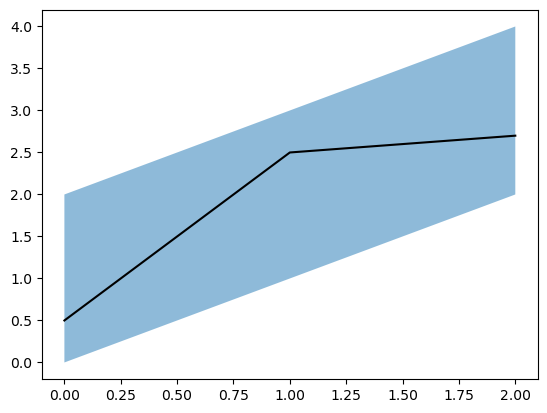

In [32]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0.5, 2.5, 2.7], color='k', zorder=20)
ax.fill_between([0, 1, 2], [0, 1, 2], [2, 3, 4], alpha=0.5, zorder=0)

ax.set_rasterization_zorder(1)

fig.savefig('test.eps', dpi=10)